# Kmeans
  This file is run in **Google Colab**. The following code is to upload the dataset. It is similar to Jupyter. 



In [0]:

from google.colab import files
uploaded = files.upload()

Saving bc.csv to bc (2).csv


IMPORTING all the necessary packages necessary to run the code.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(123)
% matplotlib inline

# data Preprocessing

In [0]:
data_contents = pd.read_csv('bc.csv',header = None)
y = np.array(data_contents.iloc[:,-1])
X = data_contents.drop(data_contents.columns[[0, 10]], axis=1) 
X = np.array(X)

#Kmeans Function definitions

In [0]:
def fit(data_contents, k):
    n_samples, _ = data_contents.shape
    centers = np.float64(random.sample(list(data_contents), k))
    initial_centers = np.copy(centers)
    o_assigns = None
    n_iters = 0

    while True:
        new_assigns = [classify(points, centers) for points in data_contents]

        if new_assigns == o_assigns:
            return centers

        o_assigns = new_assigns
        n_iters += 1
        for id_ in range(k):
            points_idx = np.where(np.array(new_assigns) == id_)
            pointss = data_contents[points_idx]
            centers[id_] = pointss.mean(axis=0)


In [0]:
def calculate_distance(points, centers):
    distance = np.sqrt(np.sum((centers - points)**2, axis=1))
    return distance

In [0]:

def classify( points,centers):
    distance = calculate_distance(points, centers)
    return np.argmin(distance)


In [0]:
def distance_l2(points, center):
  distance = np.sum(center - points)** 2
  return distance

def plot_figure(k, lk_distances):

  fig = plt.figure(figsize=(8,6))
  plt.scatter(k,lk_distances)
  plt.plot(k,lk_distances)
  plt.title("Number of Clusters vs Potential function values")
  plt.xlabel("Number of Clusters")
  plt.ylabel("Potential function values for each cluster")
  plt.show()

In [0]:
number_of_clusters = [2,3,4,5,6,7,8,9]
lk_distances = []
for i in number_of_clusters:
  centers = fit(X,i)
  distances = [classify(points, centers) for points in X]
  distances = np.array(distances)
  center_distances = 0
  for points in range(len(X)):
    center_distances = center_distances +  distance_l2(X[points], centers[distances[points]])
  lk_distances.append(center_distances)

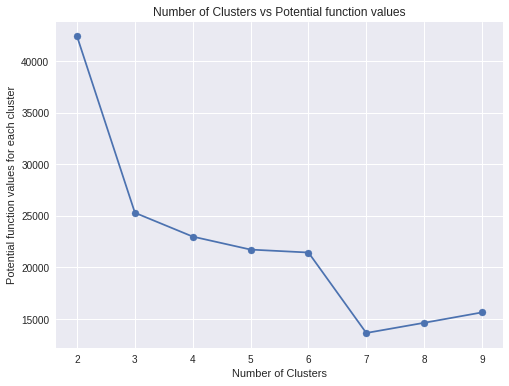

In [0]:
plot_figure(k,lk_distances)